# WNBA studying the dataset

Goal: The project aims to explore the WNBA Player stats Season 2016-2017

Dataset:The dataset is about basketball players in the WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the 2016-2017 season ([kaggle.com](https://www.kaggle.com/datasets/jinxbe/wnba-player-stats-2017))

### <a id = 0> Table of contents:</a>

---

1. [Sampling Error](#1)
2. [Simple Random Sampling](#2)
3. [Stratified Sampling](#3)
4. [Proportional Stratified Sampling](#4)
5. [Cluster Sampling](#5)
6. [Frequency Distribution Tables](#6)
7. [Sorting Tables for Ordinal Variables](#7)
8. [Percentiles and Percentile Ranks](#8)
9. [Grouped Frequency Distribution Tables](#9)

<a id = 1> **Sampling Error**: </a> - [Top](#0)

### About the dataset 

We will upload and explore the dataset `wnba.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

wnba = pd.read_csv("wnba.csv")
print(wnba.head())
wnba.tail()
print(wnba.shape)
parameter = wnba["Games Played"].max()
sample = wnba.sample(30, random_state = 1)
statistic = sample["Games Played"].max()
sampling_error = parameter  - statistic
print(sampling_error)

              Name Team  Pos  Height  Weight        BMI Birth_Place  \
0    Aerial Powers  DAL    F     183    71.0  21.200991          US   
1      Alana Beard   LA  G/F     185    73.0  21.329438          US   
2     Alex Bentley  CON    G     170    69.0  23.875433          US   
3  Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   

           Birthdate  Age         College  ... OREB  DREB  REB  AST  STL  BLK  \
0   January 17, 1994   23  Michigan State  ...    6    22   28   12    3    6   
1       May 14, 1982   35            Duke  ...   19    82  101   72   63   13   
2   October 27, 1990   26      Penn State  ...    4    36   40   78   22    3   
3  December 11, 1988   28    Georgia Tech  ...   35   134  169   65   20   10   
4     August 5, 1994   23          Baylor  ...    3     9   12   12    7    0   

   TO  PTS  DD2  TD3  
0  12   93    0    0  
1  40  217    0    0  
2  24  218    0  

`Sampling error` here represents the difference between the parameter—the maximum number of games played per player in the entire dataset—and the statistic—the maximum number of games played per player in a sample dataset of 30 players.

<a id = 2> Simple Random Sampling: </a> - [Top](#0)

Let's visualize the discrepancy between a parameter and its corresponding statistics in the case of simple random sampling.

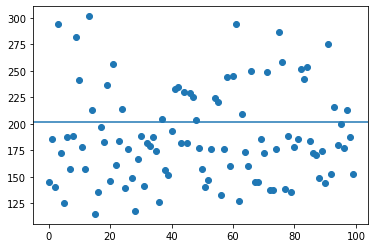

In [2]:
population_mean = wnba["PTS"].mean()
means = []
for i in range(100):
    sample = wnba["PTS"].sample(10, random_state = i)
    means.append(sample.mean())
    
plt.scatter(range(0,100), means)
plt.axhline(population_mean)
plt.show()

<a id = 3> **Stratified Sampling**: </a> - [Top](#0)

In [3]:
print(wnba['Pos'].unique())

['F' 'G/F' 'G' 'C' 'F/C']


There are five unique positions in our data set.

|Abbreviation|Full name|
|-----------|-----------|
|F|Forward|
|G|Guard|
|C|Center|
|G/F|Guard/Forward|
|F/C|Forward/Center|

We will perform stratified sampling: stratify the dataset by player position, and then do simple random sampling on every stratum. At the end, we will use the sample to determine which position scores the highest number of points per game.

In [4]:
wnba["Points per season"] = wnba["PTS"]/wnba["Games Played"]
stratum_G = wnba[wnba["Pos"] == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba["Pos"] == "F/C"]

points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    sample_data = stratum["Points per season"].sample(10, random_state=0)
    points_per_position[position] = sample_data.mean()

print(points_per_position)
position_most_points = max(points_per_position, key = points_per_position.get) #To find the dictionary key that has the greatest dictionary value
print("Position with most points: ", position_most_points)

{'G': 7.092926195632343, 'F': 8.702175158545568, 'C': 9.833761394334251, 'G/F': 6.817264935760487, 'F/C': 9.059118773946361}
Position with most points:  C


<a id = 4> **Proportional Stratified Sampling**: </a> - [Top](#0)

We will stratify the dataset by the number of games played in the following way: the first stratum should include players who played 12 games or fewer; the second stratum should players who played more than 12 games but up to 22 (included); the third stratum should include players who played more than 22 games (22 not included). After we will perform stratified sampling 100 times. 

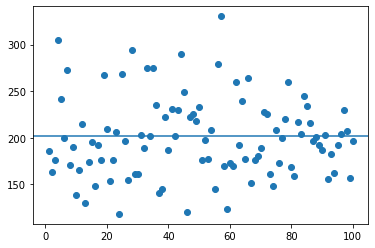

In [5]:
stratum_1 = wnba[wnba["Games Played"] <= 12]
stratum_2 = wnba[ (wnba["Games Played"] > 12) & (wnba["Games Played"] <= 22)]
stratum_3 = wnba[wnba["Games Played"] > 22]

proportional_sampling_means = []

for i in range(100):
    sample1 = stratum_1["PTS"].sample(1, random_state = i)
    sample2 = stratum_2["PTS"].sample(2, random_state = i)
    sample3 = stratum_3["PTS"].sample(7, random_state = i)
    final_sample = pd.concat([sample1, sample2, sample3])
    proportional_sampling_means.append(final_sample.mean())
    
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())
plt.show()

<a id = 5> **Cluster Sampling**: </a> - [Top](#0)

We will pick 4 team clusters randomly and estimate the mean for the following player attributes:

- Height
- Age
- BMI
- Total points

In [6]:
print(wnba["Team"].unique())

sample4 = pd.Series(wnba["Team"].unique()).sample(4, random_state=0)
print(sample4)

wnba4 = pd.DataFrame()

for cluster in sample4:
    data = wnba[wnba["Team"] == cluster]
    wnba4 = pd.concat([wnba4, data])
    
print(wnba4.head())    
sampling_error_height = wnba['Height'].mean() - wnba4['Height'].mean()
sampling_error_age = wnba['Age'].mean() - wnba4['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - wnba4['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - wnba4['PTS'].mean()

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']
6     PHO
11    IND
4     MIN
10    ATL
dtype: object
               Name Team  Pos  Height  Weight        BMI Birth_Place  \
6     Alexis Prince  PHO    G     188    81.0  22.917610          US   
15   Angel Robinson  PHO  F/C     198    88.0  22.446689          US   
25  Brittney Griner  PHO    C     206    93.0  21.915355          US   
27   Camille Little  PHO    F     188    82.0  23.200543          US   
32     Cayla George  PHO    C     193    87.0  23.356332          AU   

           Birthdate  Age         College  ... DREB  REB  AST  STL  BLK  TO  \
6   February 5, 1994   23          Baylor  ...   14   15    5    4    3   3   
15   August 30, 1995   21   Arizona State  ...   42   58    8    1   11  16   
25  October 18, 1990   26          Baylor  ...  129  172   39   13   54  52   
27  January 18, 1985   32  North Carolina  ...   71  113   42   28   13  50   
32    April 20, 1987   30         Georgia  ...

<a id = 6> **Frequency Distribution Tables**: </a> - [Top](#0)

Using the Series.value_counts() method, we will generate frequency distribution tables for the following columns: Pos, Height, and Age.

In [7]:
freq_distro_pos = wnba["Pos"].value_counts()
print("Distribution of positions:\n", freq_distro_pos)
print("Distribution of positions in %:\n", wnba['Pos'].value_counts(normalize = True) * 100)
freq_distro_height = wnba["Height"].value_counts()
print("Distribution of heights:\n",freq_distro_height)
age_ascending = wnba["Age"].value_counts().sort_index()
print("Distribution of age:\n",age_ascending)

Distribution of positions:
 G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64
Distribution of positions in %:
 G      41.958042
F      23.076923
C      17.482517
G/F     9.090909
F/C     8.391608
Name: Pos, dtype: float64
Distribution of heights:
 188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64
Distribution of age:
 21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: Age, dtype: int64


<a id = 7> **Sorting Tables for Ordinal Variables**: </a> - [Top](#0)

We will generate a frequency distribution table for the transformed PTS_ordinal_scale column, that gives a lablel to the amount of points each player scored.

In [8]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)
print(wnba['PTS_ordinal_scale'].value_counts().iloc[[4,3,0,2,1,5]])

much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64


<a id = 8> **Percentiles and Percentile Ranks**: </a> - [Top](#0)

We will try to answer question "What percentage of players are 23 years or younger?". We will use the percentileofscore(a, score, kind='weak') function from scipy.stats. We need to use kind = 'weak' to indicate that we want to find the percentage of values that are equal to or less than the value we specify in the score parameter.

In [9]:
from scipy.stats import percentileofscore
print(percentileofscore(a=wnba['Age'], score=23, kind='weak'))

18.88111888111888


<a id = 9> **Grouped Frequency Distribution Tables**: </a> - [Top](#0)

We will examine the frequency table for the PTS (total points) variable trying to find some patterns in the distribution of values. Then, we will generate a grouped frequency distribution table for the PTS variable with the following characteristics:
- The table has 10 class intervals.
- For each class interval, the table shows percentages instead of frequencies.
- The class intervals are sorted in descending order.

In [10]:
grouped_freq_table = wnba["PTS"].value_counts(bins = 10, normalize = True).sort_index(ascending=True)*100
print(grouped_freq_table)

(1.417, 60.2]     20.979021
(60.2, 118.4]     16.783217
(118.4, 176.6]    11.888112
(176.6, 234.8]    13.986014
(234.8, 293.0]    11.888112
(293.0, 351.2]     5.594406
(351.2, 409.4]     6.993007
(409.4, 467.6]     5.594406
(467.6, 525.8]     2.797203
(525.8, 584.0]     3.496503
Name: PTS, dtype: float64


We will make the same table but using the intervals using the pd.interval_range() function, which will make the data more understandable.

In [11]:
intervals = pd.interval_range(start=0, end=600, freq=60)
gr_freq_table_10 = wnba["PTS"].value_counts(bins = intervals).sort_index()
print(gr_freq_table_10)

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
Name: PTS, dtype: int64
